<a href="https://colab.research.google.com/github/yashaswinicse/CodSoft-Internship/blob/main/Customet_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [2]:
# reading the dataset
churn = pd.read_csv('Churn_Modelling.csv')

In [3]:
# few rows
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(churn.shape)

(10000, 14)


In [5]:
# checking the number of missing values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualization

# Countplot

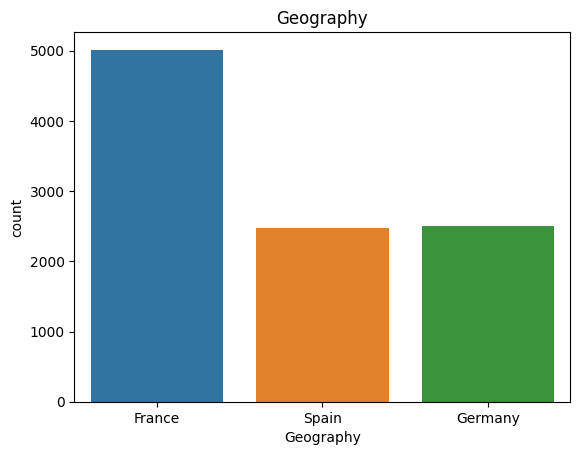

In [8]:
sns.countplot(x=churn['Geography'])
plt.title('Geography')
plt.show()

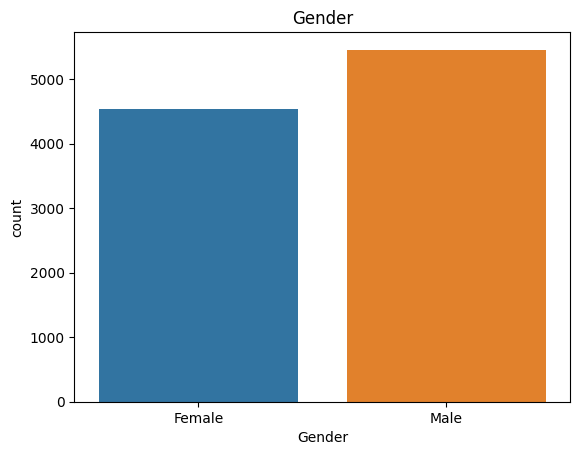

In [9]:
sns.countplot(x=churn['Gender'])
plt.title('Gender')
plt.show()

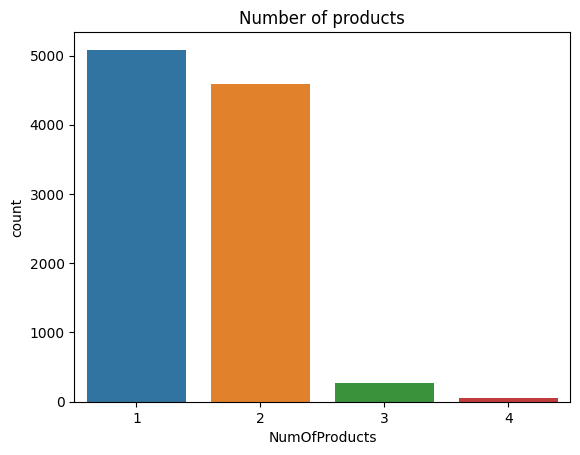

In [10]:
sns.countplot(x=churn['NumOfProducts'])
plt.title('Number of products')
plt.show()

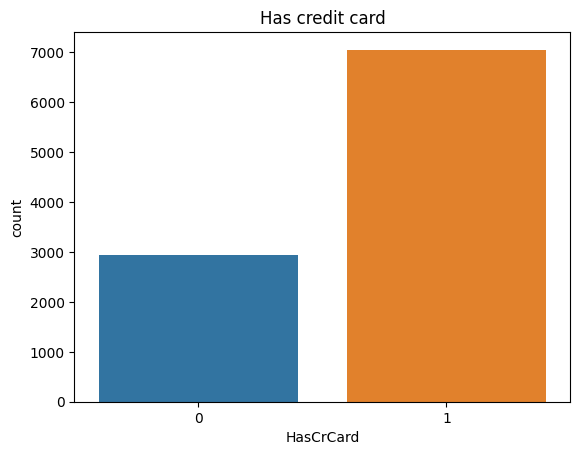

In [11]:
sns.countplot(x=churn['HasCrCard'])
plt.title('Has credit card')
plt.show()

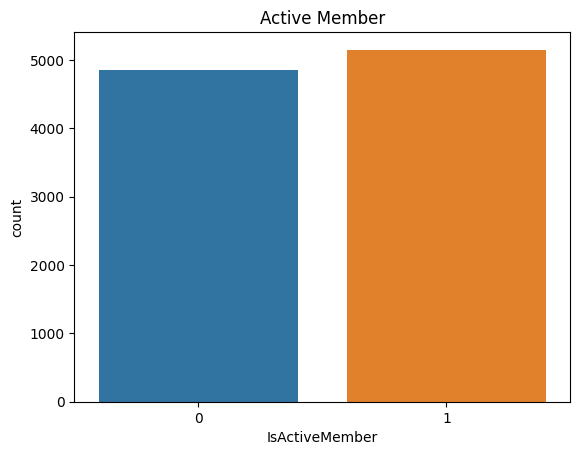

In [12]:
sns.countplot(x=churn['IsActiveMember'])
plt.title('Active Member')
plt.show()

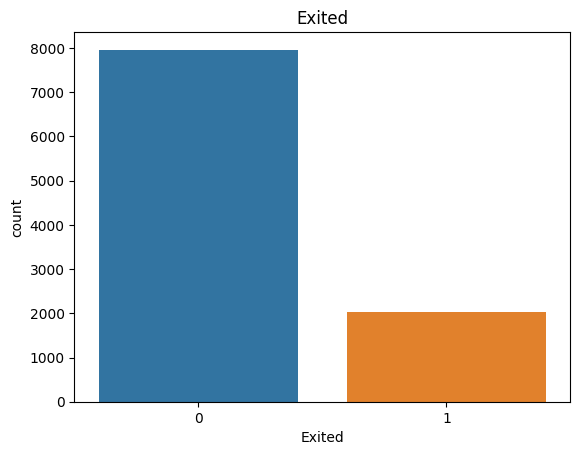

In [13]:
sns.countplot(x=churn['Exited'])
plt.title('Exited')
plt.show()

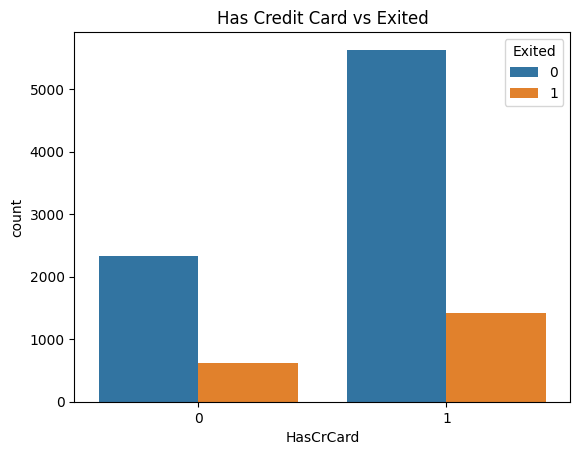

In [14]:
sns.countplot(x='HasCrCard',hue='Exited', data=churn)
plt.title('Has Credit Card vs Exited')
plt.show()

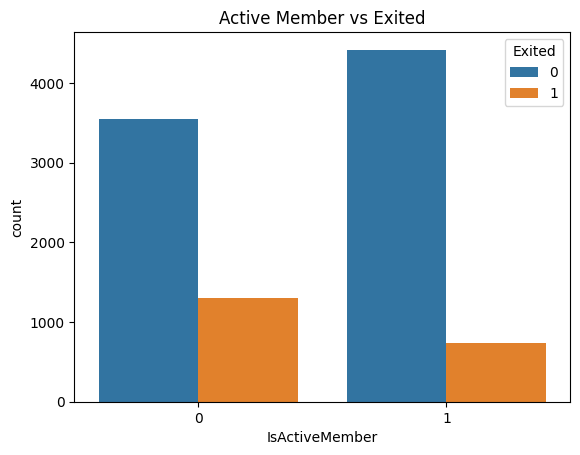

In [15]:
sns.countplot(x='IsActiveMember',hue='Exited', data=churn)
plt.title('Active Member vs Exited')
plt.show()

# Correlation Matrix

<Axes: >

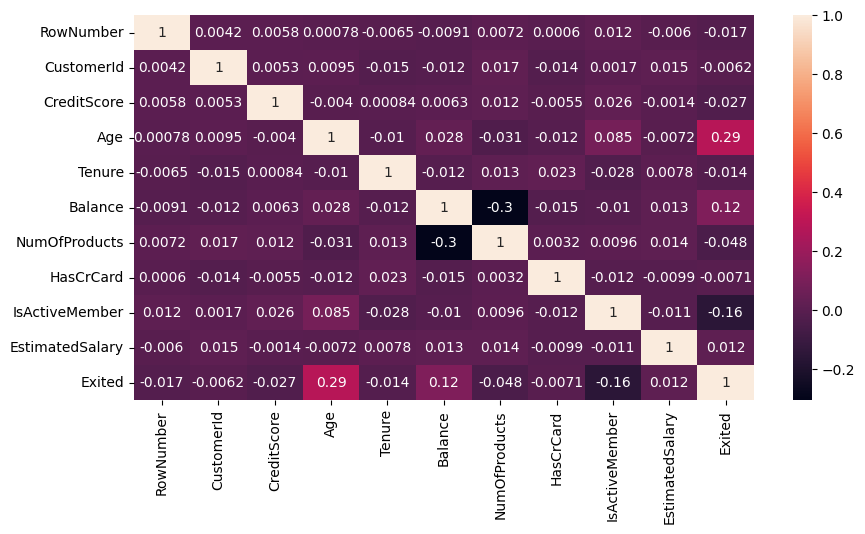

In [16]:
plt.figure(figsize = (10,5))
sns.heatmap(churn.corr(), annot = True)

In [17]:
X = churn.drop('Exited',axis = 1)
Y = churn['Exited']

In [18]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
col = ['Gender','Surname','Geography']
enc = OrdinalEncoder()
X[col] = enc.fit_transform(X[col])

# Splitting the data into Training and Testing Data

In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,random_state = 42)

In [20]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(7500, 13) (2500, 13)
(7500,) (2500,)


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
lr_ac = accuracy_score(Y_test,Y_pred)*100
print('Accuracy of Logistic Regression',lr_ac)

Accuracy of Logistic Regression 80.12


In [24]:
conf = confusion_matrix(Y_test,Y_pred)
print(conf)

[[2003    0]
 [ 497    0]]


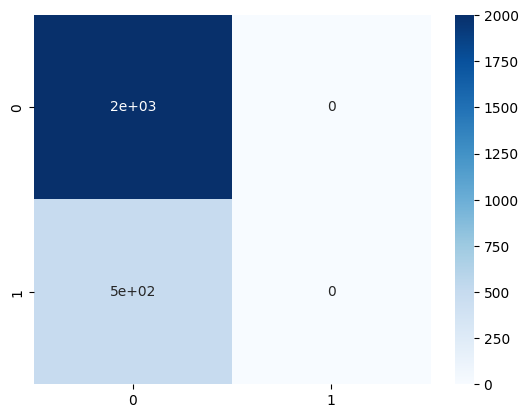

In [25]:
sns.heatmap(conf,annot=True,cmap="Blues")
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
rnd.fit(X_train,Y_train)
Y_predict = rnd.predict(X_test)

In [27]:
#to check the accuracy of training data
rd_ac = accuracy_score(Y_test,Y_predict)*100
print('Accuracy of RandomForest',rd_ac)

Accuracy of RandomForest 86.64


In [28]:
conf = confusion_matrix(Y_test,Y_predict)
print(conf)

[[1964   39]
 [ 295  202]]


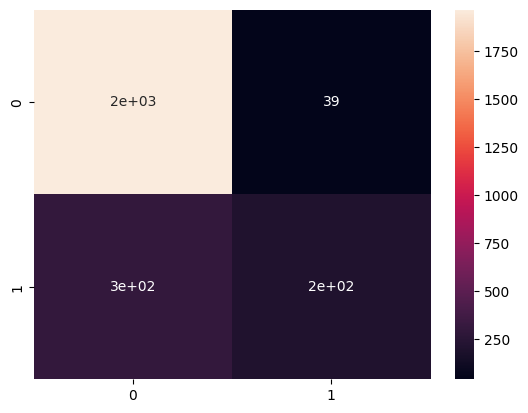

In [29]:
sns.heatmap(conf,annot=True)
plt.show()

In [30]:
models = pd.DataFrame({'Model':['LogisticRegression','Random Forest'],
                         'Accuracy Score' : [lr_ac, rd_ac]})
models

,Model,Accuracy Score
0,LogisticRegression,80.12
1,Random Forest,86.64
